# Airlines_Delay - Prediction

# Problem Statement
Airlines dataset has 539383 instances and 8 different features. The task is to predict whether a given flight will be delayed, given the information of the scheduled departure

## Input Features:

1.   Airline
2.   Flight
3.   Airport From
4.   Airport To
5.   DayOfWeek
6.   Time
7.   Length
8.   Delay

## Output Feature:
*   Delay: 1 if airline gets delayed, 0 if not

In [117]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [118]:
df = pd.read_csv('/content/Airlines.csv')
df

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0
...,...,...,...,...,...,...,...,...,...
539378,539379,CO,178,OGG,SNA,5,1439,326,0
539379,539380,FL,398,SEA,ATL,5,1439,305,0
539380,539381,FL,609,SFO,MKE,5,1439,255,0
539381,539382,UA,78,HNL,SFO,5,1439,313,1


In [119]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           539383 non-null  int64 
 1   Airline      539383 non-null  object
 2   Flight       539383 non-null  int64 
 3   AirportFrom  539383 non-null  object
 4   AirportTo    539383 non-null  object
 5   DayOfWeek    539383 non-null  int64 
 6   Time         539383 non-null  int64 
 7   Length       539383 non-null  int64 
 8   Delay        539383 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 37.0+ MB


None

In [120]:
df.describe()

,id,Flight,DayOfWeek,Time,Length,Delay
count,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000
mean,269692.000000,2427.928630,3.929668,802.728963,132.202007,0.445442
std,155706.604461,2067.429837,1.914664,278.045911,70.117016,0.497015
min,1.000000,1.000000,1.000000,10.000000,0.000000,0.000000
25%,134846.500000,712.000000,2.000000,565.000000,81.000000,0.000000
50%,269692.000000,1809.000000,4.000000,795.000000,115.000000,0.000000
75%,404537.500000,3745.000000,5.000000,1035.000000,162.000000,1.000000
max,539383.000000,7814.000000,7.000000,1439.000000,655.000000,1.000000


##Data Cleaning

In [121]:
df.isna().sum()

id             0
Airline        0
Flight         0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Time           0
Length         0
Delay          0
dtype: int64

In [122]:
df = df.drop(['id'],axis = 1)

In [123]:
df

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,CO,269,SFO,IAH,3,15,205,1
1,US,1558,PHX,CLT,3,15,222,1
2,AA,2400,LAX,DFW,3,20,165,1
3,AA,2466,SFO,DFW,3,20,195,1
4,AS,108,ANC,SEA,3,30,202,0
...,...,...,...,...,...,...,...,...
539378,CO,178,OGG,SNA,5,1439,326,0
539379,FL,398,SEA,ATL,5,1439,305,0
539380,FL,609,SFO,MKE,5,1439,255,0
539381,UA,78,HNL,SFO,5,1439,313,1


##Exploratory Data Analysis

##**Distribution of target column:**

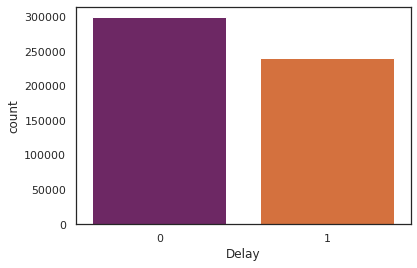

In [124]:
sns.countplot(x='Delay', data=df, palette='inferno')

In [125]:
print(df['Delay'].value_counts())

0    299119
1    240264
Name: Delay, dtype: int64


##Distribution of Categorical columns

### **Airline Feature**

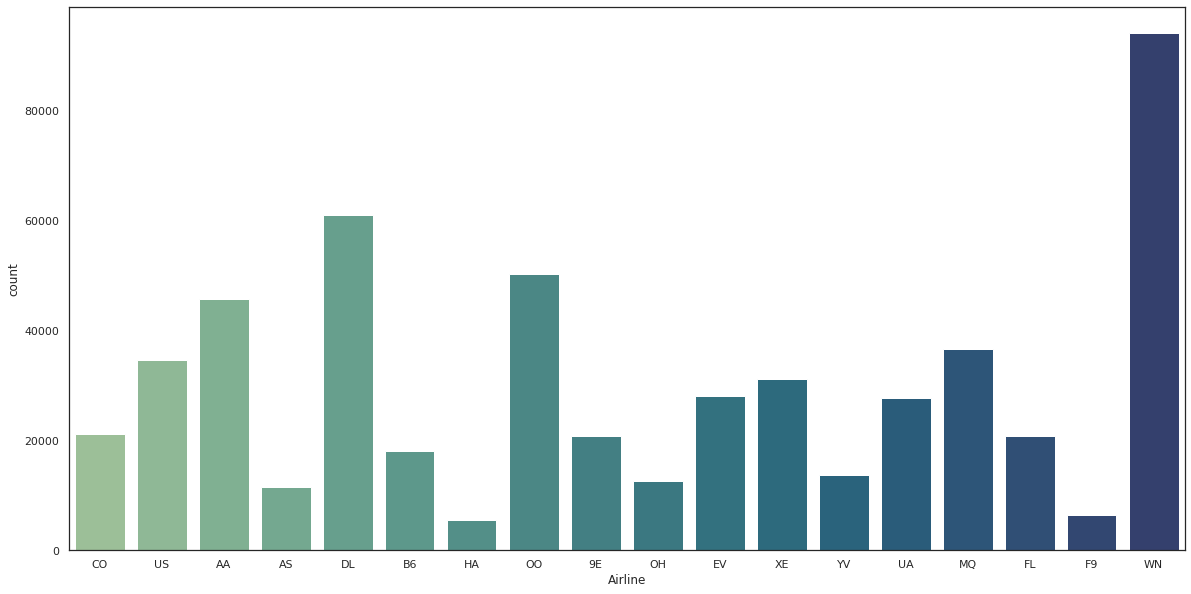

In [126]:
cat_cols = ['Airline']
plt.figure(figsize=(20, 10))
for n, variable in enumerate(cat_cols):
    ax = plt.subplot(1, 1, n + 1)
    g=sns.countplot(data=df, x=df[variable], ax=ax, palette='crest')
plt.show() 

### **AirportFrom Feature**

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

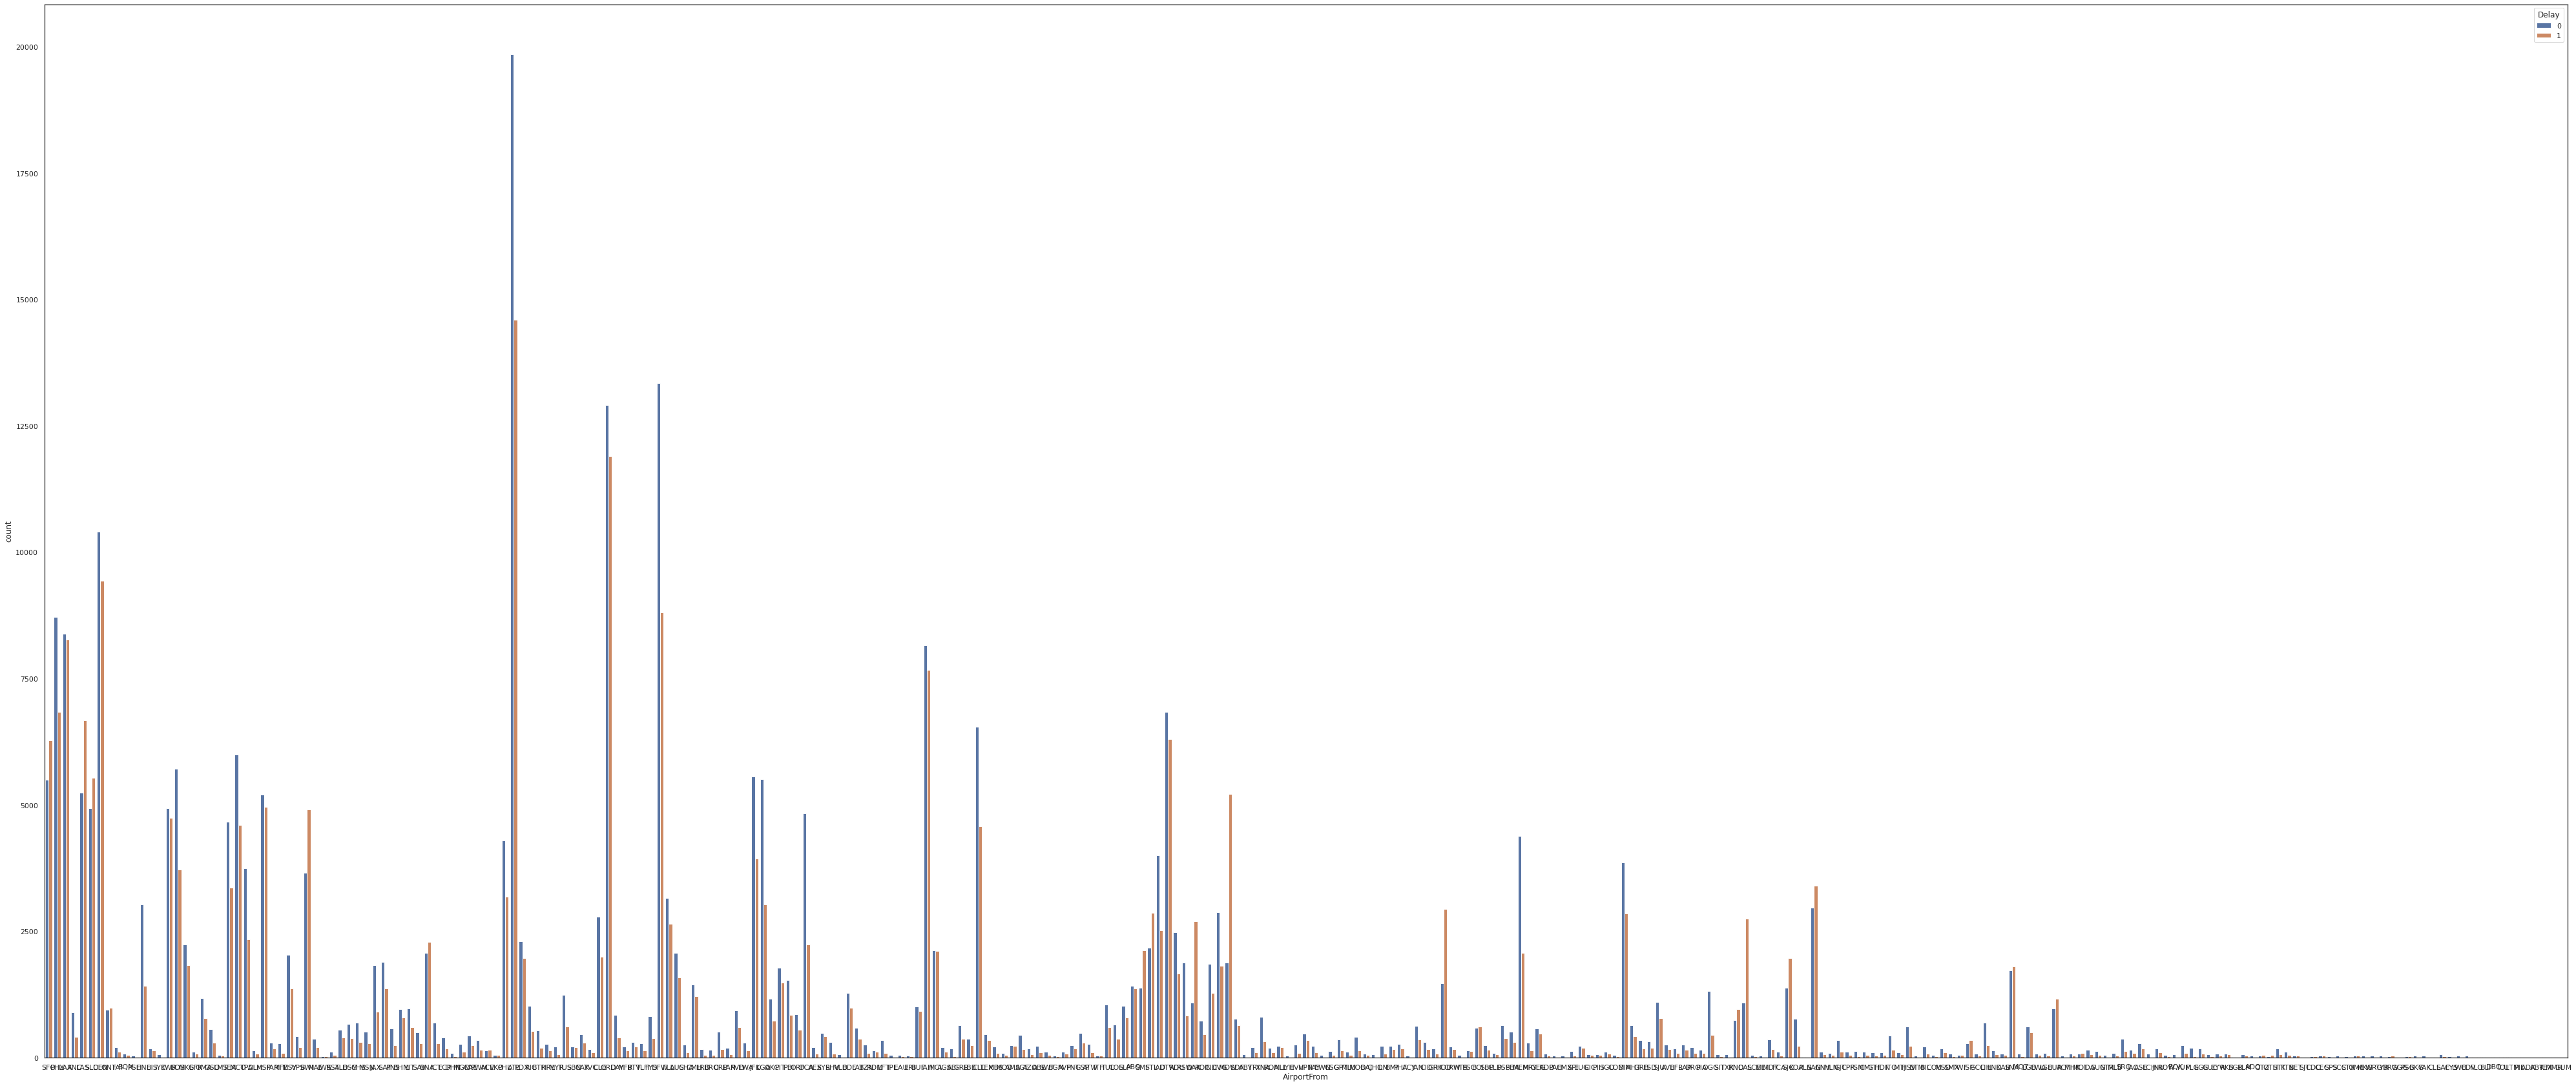

In [127]:
plt.figure(figsize=(70,30)) 
sns.set(style='white')
sns.countplot(x="AirportFrom",hue="Delay",data=df) 
plt.xticks(rotation=0,)

### **AirportTo Feature**

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

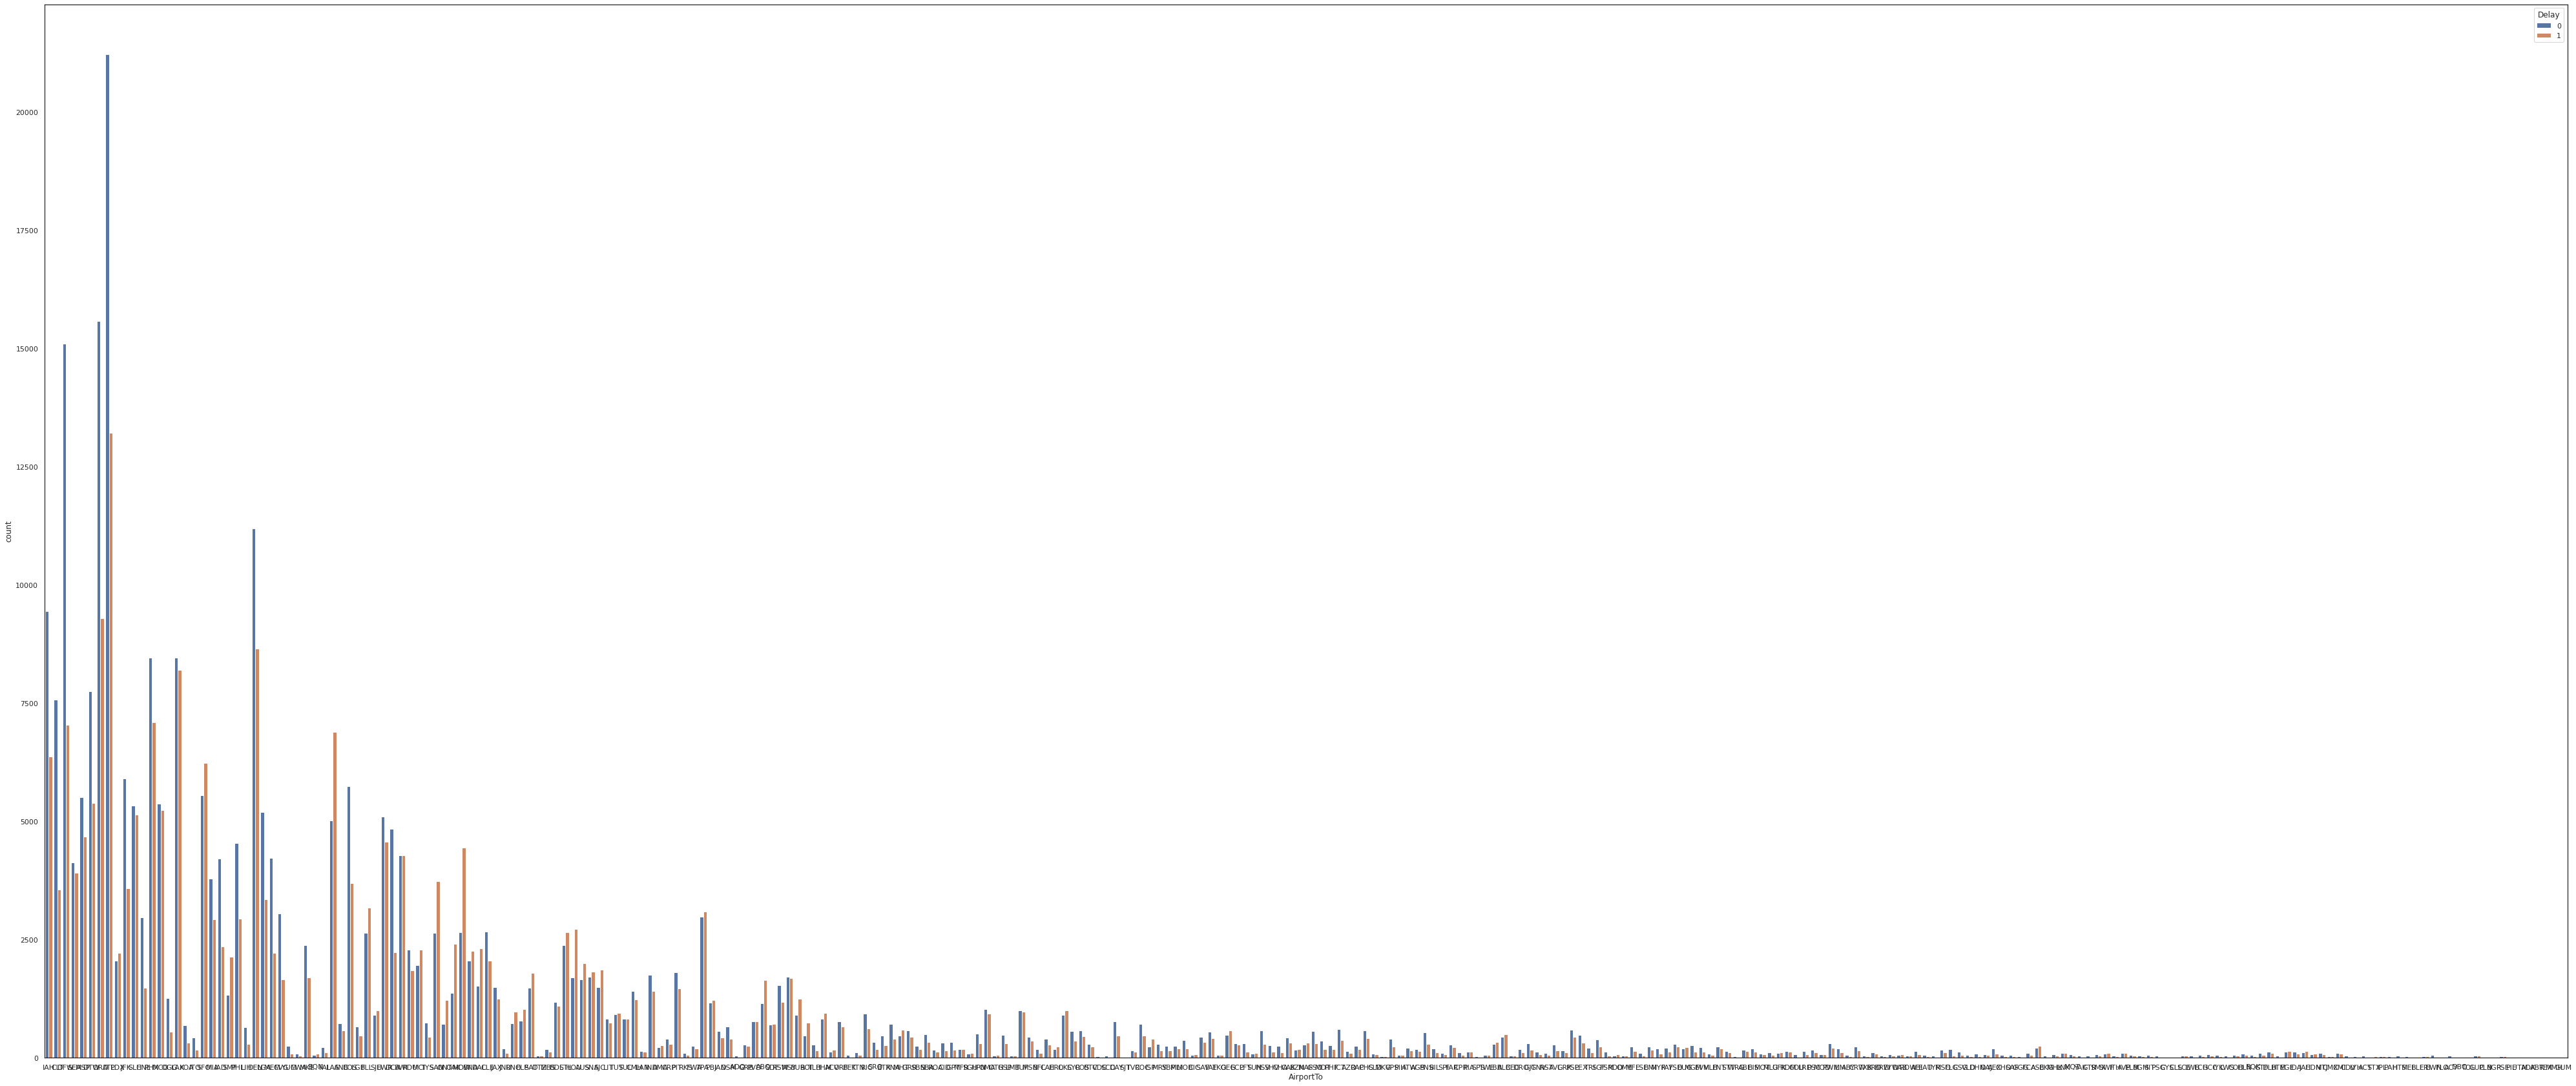

In [128]:
plt.figure(figsize=(70,30)) 
sns.set(style='white')
sns.countplot(x="AirportTo",hue="Delay",data=df)
plt.xticks(rotation=0,)

In [129]:
df['Delay'].value_counts()

0    299119
1    240264
Name: Delay, dtype: int64

In [130]:
X = df.drop(['Delay'],axis = 1)

##Distribution of numerical features - Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f26d5637990>,
      dtype=object)

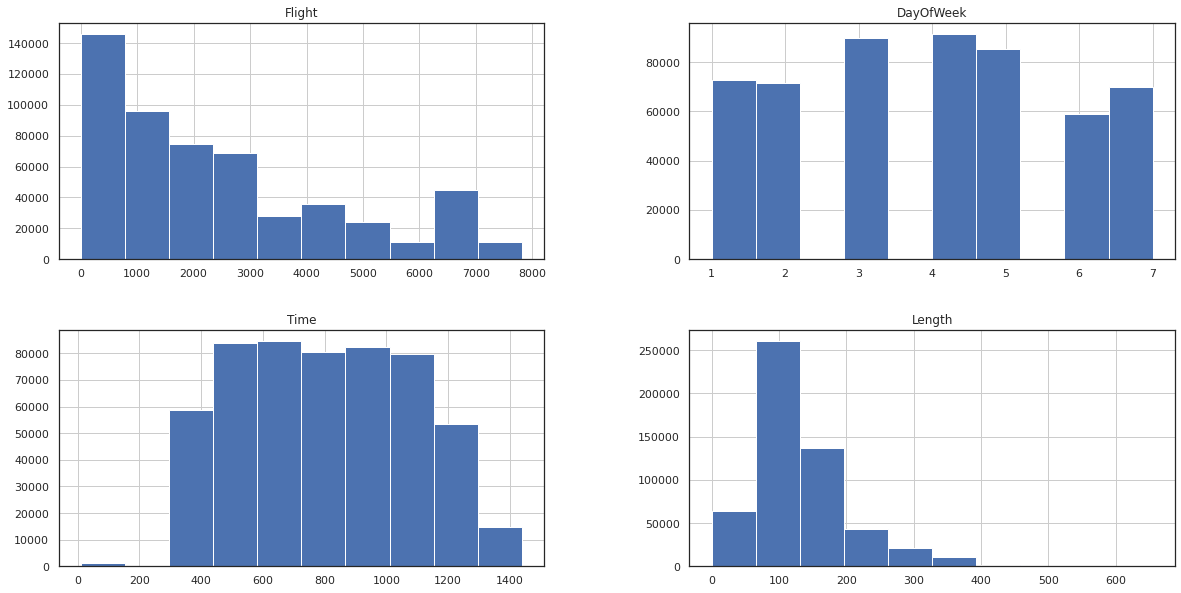

In [131]:
X.hist(column = ["Flight","DayOfWeek","Time","Length"],figsize = (20,10))

In [132]:
X['AirportFrom'].value_counts()

ATL    34449
ORD    24822
DFW    22154
DEN    19843
LAX    16657
       ...  
MMH       16
SJT       15
GUM       10
ADK        9
ABR        2
Name: AirportFrom, Length: 293, dtype: int64

In [133]:
df.AirportFrom.value_counts().loc[lambda x: x>10000].index

Index(['ATL', 'ORD', 'DFW', 'DEN', 'LAX', 'IAH', 'PHX', 'DTW', 'LAS', 'SFO',
       'CLT', 'MCO', 'SLC', 'MSP'],
      dtype='object')

In [134]:
df.AirportTo.value_counts().loc[lambda x: x>10000].index

Index(['ATL', 'ORD', 'DFW', 'DEN', 'LAX', 'IAH', 'PHX', 'DTW', 'LAS', 'SFO',
       'CLT', 'MCO', 'SLC', 'MSP'],
      dtype='object')

In [135]:
df.AirportTo.value_counts().reset_index(name="count").query("count > 10000")["index"]

0     ATL
1     ORD
2     DFW
3     DEN
4     LAX
5     IAH
6     PHX
7     DTW
8     LAS
9     SFO
10    CLT
11    MCO
12    SLC
13    MSP
Name: index, dtype: object

In [136]:
df_changed = df[df['AirportTo'].isin(["ATL","ORD","DFW","DEN","LAX","IAH","PHX","DTW","LAS","SFO","CLT","MCO","SLC","MSP"])]

In [137]:
df_changed

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,CO,269,SFO,IAH,3,15,205,1
1,US,1558,PHX,CLT,3,15,222,1
2,AA,2400,LAX,DFW,3,20,165,1
3,AA,2466,SFO,DFW,3,20,195,1
5,CO,1094,LAX,IAH,3,30,181,1
...,...,...,...,...,...,...,...,...
539371,AA,1522,SFO,ORD,5,1435,240,0
539374,DL,2354,LAX,ATL,5,1435,255,0
539375,FL,58,LAX,ATL,5,1435,250,0
539379,FL,398,SEA,ATL,5,1439,305,0


In [138]:
df_filtered = df_changed[df_changed['AirportFrom'].isin(['ATL', 'ORD', 'DFW', 'DEN', 'LAX', 'IAH', 'PHX', 'DTW', 'LAS', 'SFO', 'CLT', 'MCO', 'SLC', 'MSP'])]

In [139]:
df_filtered

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,CO,269,SFO,IAH,3,15,205,1
1,US,1558,PHX,CLT,3,15,222,1
2,AA,2400,LAX,DFW,3,20,165,1
3,AA,2466,SFO,DFW,3,20,195,1
5,CO,1094,LAX,IAH,3,30,181,1
...,...,...,...,...,...,...,...,...
539349,UA,968,LAS,ORD,5,1409,208,0
539352,DL,2216,LAS,DTW,5,1410,232,0
539371,AA,1522,SFO,ORD,5,1435,240,0
539374,DL,2354,LAX,ATL,5,1435,255,0


In [140]:
df_filtered.isna().sum()

Airline        0
Flight         0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Time           0
Length         0
Delay          0
dtype: int64

In [141]:
AirportFrom = pd.get_dummies(df_filtered['AirportFrom'],prefix='AirportFrom_')
print(AirportFrom.shape)
AirportFrom.head()

(65599, 14)


,AirportFrom__ATL,AirportFrom__CLT,AirportFrom__DEN,AirportFrom__DFW,AirportFrom__DTW,AirportFrom__IAH,AirportFrom__LAS,AirportFrom__LAX,AirportFrom__MCO,AirportFrom__MSP,AirportFrom__ORD,AirportFrom__PHX,AirportFrom__SFO,AirportFrom__SLC
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [142]:
AirportTo = pd.get_dummies(df_filtered['AirportTo'],prefix='AirportTo_')
print(AirportTo.shape)
AirportTo.head()

(65599, 14)


,AirportTo__ATL,AirportTo__CLT,AirportTo__DEN,AirportTo__DFW,AirportTo__DTW,AirportTo__IAH,AirportTo__LAS,AirportTo__LAX,AirportTo__MCO,AirportTo__MSP,AirportTo__ORD,AirportTo__PHX,AirportTo__SFO,AirportTo__SLC
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [143]:
Airline = pd.get_dummies(df_filtered['Airline'],prefix='Airline_')
print(Airline.shape)
Airline.head()

(65599, 15)


,Airline__9E,Airline__AA,Airline__CO,Airline__DL,Airline__EV,Airline__F9,Airline__FL,Airline__MQ,Airline__OH,Airline__OO,Airline__UA,Airline__US,Airline__WN,Airline__XE,Airline__YV
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [144]:
df_filtered = pd.concat([df_filtered,AirportFrom,AirportTo,Airline],axis=1)
df_filtered.head()

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,AirportFrom__ATL,AirportFrom__CLT,...,Airline__F9,Airline__FL,Airline__MQ,Airline__OH,Airline__OO,Airline__UA,Airline__US,Airline__WN,Airline__XE,Airline__YV
0,CO,269,SFO,IAH,3,15,205,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,US,1558,PHX,CLT,3,15,222,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,AA,2400,LAX,DFW,3,20,165,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,AA,2466,SFO,DFW,3,20,195,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,CO,1094,LAX,IAH,3,30,181,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [145]:
df_filtered = df_filtered.drop(['Airline'],axis=1)
df_filtered = df_filtered.drop(['AirportFrom'],axis=1)
df_filtered = df_filtered.drop(['AirportTo'],axis=1)
df_filtered.head()

,Flight,DayOfWeek,Time,Length,Delay,AirportFrom__ATL,AirportFrom__CLT,AirportFrom__DEN,AirportFrom__DFW,AirportFrom__DTW,...,Airline__F9,Airline__FL,Airline__MQ,Airline__OH,Airline__OO,Airline__UA,Airline__US,Airline__WN,Airline__XE,Airline__YV
0,269,3,15,205,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1558,3,15,222,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2400,3,20,165,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2466,3,20,195,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1094,3,30,181,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [146]:
Y1 = df_filtered['Delay']

In [147]:
X1 = df_filtered.drop(['Delay'],axis=1)
X1.columns

Index(['Flight', 'DayOfWeek', 'Time', 'Length', 'AirportFrom__ATL',
       'AirportFrom__CLT', 'AirportFrom__DEN', 'AirportFrom__DFW',
       'AirportFrom__DTW', 'AirportFrom__IAH', 'AirportFrom__LAS',
       'AirportFrom__LAX', 'AirportFrom__MCO', 'AirportFrom__MSP',
       'AirportFrom__ORD', 'AirportFrom__PHX', 'AirportFrom__SFO',
       'AirportFrom__SLC', 'AirportTo__ATL', 'AirportTo__CLT',
       'AirportTo__DEN', 'AirportTo__DFW', 'AirportTo__DTW', 'AirportTo__IAH',
       'AirportTo__LAS', 'AirportTo__LAX', 'AirportTo__MCO', 'AirportTo__MSP',
       'AirportTo__ORD', 'AirportTo__PHX', 'AirportTo__SFO', 'AirportTo__SLC',
       'Airline__9E', 'Airline__AA', 'Airline__CO', 'Airline__DL',
       'Airline__EV', 'Airline__F9', 'Airline__FL', 'Airline__MQ',
       'Airline__OH', 'Airline__OO', 'Airline__UA', 'Airline__US',
       'Airline__WN', 'Airline__XE', 'Airline__YV'],
      dtype='object')

##Training and Test Datasets

In [157]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X1, Y1, test_size=0.3, random_state = 42)

## ML Classification Models

## Logistic Regression

In [158]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lr=LogisticRegression(penalty='l2', solver = 'liblinear', max_iter = 500)
lr.fit(x_train,y_train)

LogisticRegression(max_iter=500, solver='liblinear')

In [159]:
lr.predict(x_test)

array([0, 0, 1, ..., 0, 1, 0])

In [160]:
print(classification_report(y_test, lr.predict(x_test), target_names=['Delay','No Delay']))

              precision    recall  f1-score   support

       Delay       0.62      0.69      0.65     10042
    No Delay       0.63      0.56      0.59      9638

    accuracy                           0.63     19680
   macro avg       0.63      0.62      0.62     19680
weighted avg       0.63      0.63      0.62     19680



In [161]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, lr.predict_proba(x_test)[:, 1])

0.6789312496975248

##Random Forest

In [182]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(criterion='gini', n_estimators= 500)
RF.fit(x_train,y_train)

RandomForestClassifier(n_estimators=500)

In [183]:
RF.predict(x_test)

array([0, 0, 0, ..., 0, 1, 1])

In [184]:
print(classification_report(y_test, RF.predict(x_test), target_names=['Delay','No Delay']))

              precision    recall  f1-score   support

       Delay       0.62      0.64      0.63     10042
    No Delay       0.61      0.59      0.60      9638

    accuracy                           0.62     19680
   macro avg       0.62      0.62      0.62     19680
weighted avg       0.62      0.62      0.62     19680



In [185]:
roc_auc_score(y_test, RF.predict_proba(x_test)[:, 1])

0.6647125546454631

## XGBoost Classifier

In [186]:
import xgboost as xgb
from xgboost import XGBClassifier

In [187]:
xgbc = XGBClassifier(learning_rate=0.1, n_estimators=500)
xgbc.fit(x_train,y_train)

XGBClassifier(n_estimators=500)

In [188]:
xgbc.predict(x_test)

array([0, 0, 1, ..., 0, 1, 0])

In [189]:
print(classification_report(y_test, xgbc.predict(x_test), target_names=['Delay','No Delay']))

              precision    recall  f1-score   support

       Delay       0.65      0.71      0.68     10042
    No Delay       0.67      0.60      0.63      9638

    accuracy                           0.66     19680
   macro avg       0.66      0.66      0.66     19680
weighted avg       0.66      0.66      0.66     19680



In [190]:
roc_auc_score(y_test, xgbc.predict_proba(x_test)[:, 1])

0.7209948502655313

##**Out of the 3 Classification models, XGBoost Classifier gives better AU-ROC score of 0.72, hence this model is the best**